## Iris flower has three species; setosa, versicolor, and virginica, which differs according to their 
measurements. Now assume that you have th  measurements of the iris flowers according t 
their species, and here your task is to train a machine learning model that can learn from t e
measurements of the iris species and classify t em
Although the Scikit-learn library provides a dataset for iris flower classification, you can  lso
download the same dataset from here for the task of iris flower classification with Ma hine
Learning.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_iris

In [3]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
print (iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)


In [21]:
print("=== ACCURACY SCORE ===")
print( accuracy_score(y_test, y_pred))
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

import pandas as pd
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index=iris.feature_names,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print("=== FEATURE IMPORTANCE ===")
print(feature_importances)

=== ACCURACY SCORE ===
1.0
=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== FEATURE IMPORTANCE ===
                   Importance
petal length (cm)    0.445257
petal width (cm)     0.420793
sepal length (cm)    0.105913
sepal width (cm)     0.028037


=== ACCURACY ===
1.0
=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



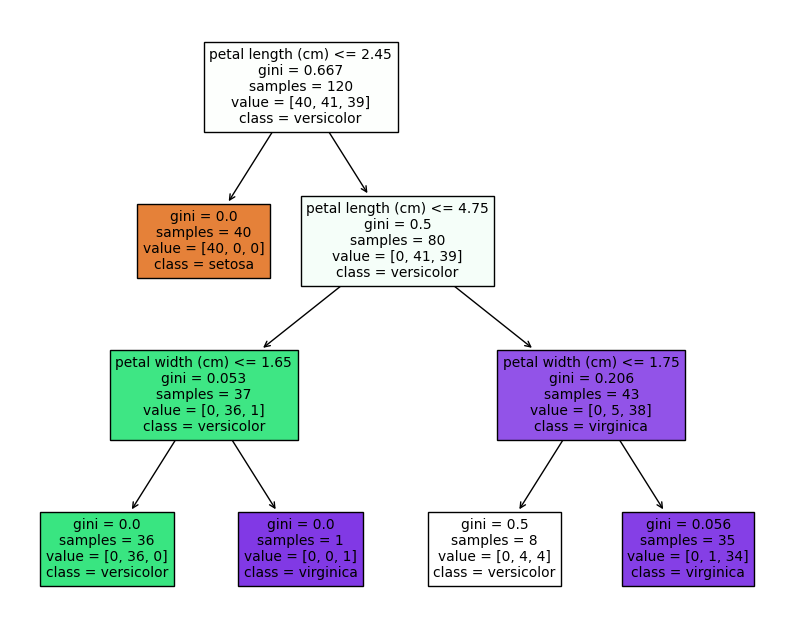

In [23]:
# because the model is overfitting i decided to try Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("=== ACCURACY ===")
print(accuracy_score(y_test, y_pred))
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [25]:
# Using logistic Regression performance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=200)  # Increase max_iter for convergence
log_reg_model.fit(X_train, y_train)
y_pred_logreg = log_reg_model.predict(X_test)


print("\n=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(classification_report(y_test, y_pred_logreg, target_names=iris.target_names))



=== Logistic Regression Performance ===
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [27]:
from sklearn.model_selection import cross_val_score
dt_model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dt_model, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.9533333333333334
